In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    final_number: int

In [3]:
def adder(state: AgentState) -> AgentState:
    '''Adds the two numbers in state'''
    state['final_number'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    '''Subtract number 1 from number 2 in state'''
    state['final_number'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    '''Selects the next node in the graph'''
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"
    return "invalid"

In [4]:
graph = StateGraph(AgentState)

graph.add_node("addition_node", adder)
graph.add_node("subtraction_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "addition_node",
        "subtraction_operation":"subtraction_node"
    }
)

graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)

app = graph.compile()

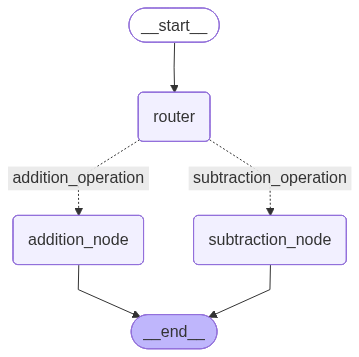

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
input = AgentState(
    number1= 10,
    number2=20,
    operation="+",
    final_number=0
)
result = app.invoke(input)
result['final_number']

30

In [8]:
input = AgentState(
    number1= 20,
    number2=10,
    operation="-",
    final_number=0
)
result = app.invoke(input)
result['final_number']

10